<a href="https://colab.research.google.com/github/Nurkyial/DataVisualization/blob/main/lab2_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Алмазова Нуркыял
М23-534


1. Импортировать данные lab2.csv

In [ ]:
import pandas as pd
df = pd.read_csv('/content/lab2 (1).csv')
df.head()

,id,name,area.name,salary.from,salary.to,salary.currency,salary.gross,employer.name,snippet.requirement,snippet.responsibility,schedule.name
0,77448260,Lead Data Engineer,Москва,NaN,500000.0,RUR,False,Wanted,С прошлого года активно развиваем новую област...,...обучения и участвовать в их продукционализа...,Гибкий график
1,77015802,Data Engineer,Москва,200000.0,280000.0,RUR,True,HR Prime,Хороший уровень работы с БД. Опыт с Python. Оп...,Поддержание работоспособности платформы. Разра...,Полный день
2,75921771,Data engineer,Москва,200000.0,250000.0,RUR,False,РВИ,"Высшее техническое образование, предпочтительн...","Системный анализ, инженерная аналитика. Разраб...",Полный день
3,77334669,Аналитик данных / Data Analyst,Москва,160000.0,200000.0,RUR,False,Юрент,Высшее техническое или экономическое образован...,Разработка и валидация новых метрик. Взаимодей...,Удаленная работа
4,77478355,Стажер Data Engineer,Москва,NaN,NaN,NaN,NaN,СБЕР,Желательно: Знание основных понятий и концепци...,"Мы команда, которая занимается созданием витри...",Полный день


2. Построить столбиковую диаграмму по числу пропущенных значений в каждом поле загруженных данных. Предварительно отсортировать частоты по убыванию.
  2.1.	Добавить данные по числу уникальных значений в каждом поле
  2.2.	Заменить фон диаграммы на серый ('#E6E6E6')
  2.3.	Заменить ширину зазоров между столбцами на















salary.to                 823
salary.from               806
salary.currency           775
salary.gross              775
snippet.responsibility      5
snippet.requirement         2
id                          0
name                        0
area.name                   0
employer.name               0
schedule.name               0
dtype: int64


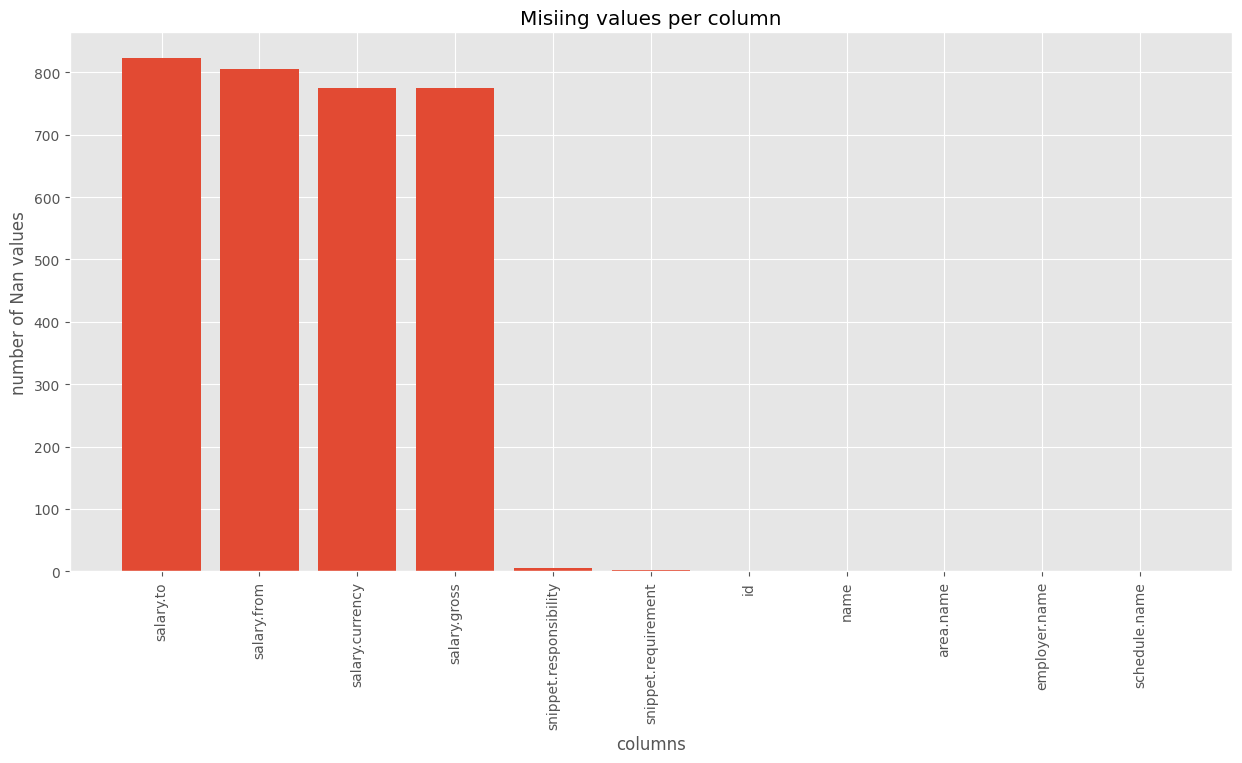

In [ ]:
import matplotlib.pyplot as plt
missing_values = df.isnull().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
print(missing_values_sorted)
fig = plt.figure(figsize=(15, 7))
ax = plt.axes()
ax.set_facecolor('#E6E6E6')
plt.bar(missing_values_sorted.index, missing_values_sorted.values)
plt.xlabel('columns')
plt.ylabel('number of Nan values')
plt.xticks(rotation=90)
plt.title('Misiing values per column')
plt.show()

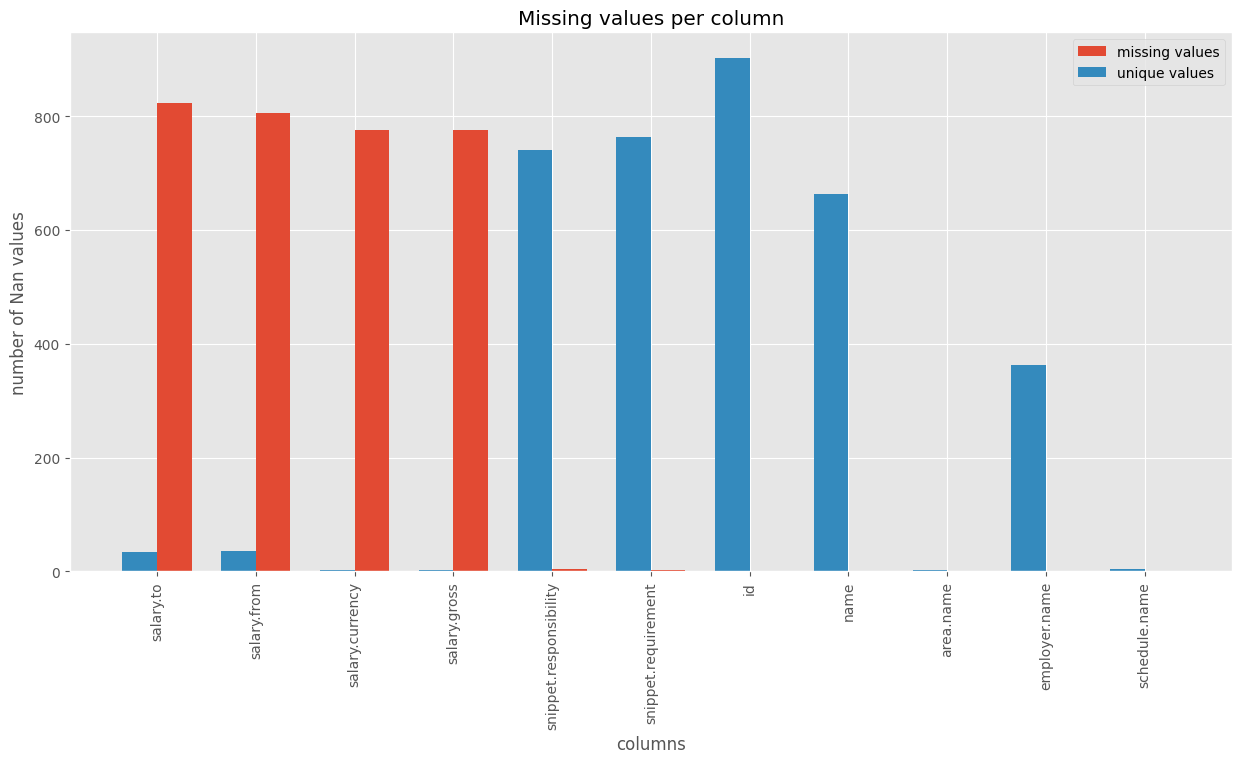

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
missing_values = df.isnull().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
unique_values = df.nunique()
unique_values_sorted = unique_values.reindex(missing_values_sorted.index)
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_facecolor('#E6E6E6')
positions = np.arange(len(missing_values_sorted))
width = 0.35
ax.bar(positions + width/2, missing_values_sorted, width=width, label='missing values')
ax.bar(positions - width/2, unique_values_sorted, width=width, label='unique values')

ax.set_xlabel('columns')
ax.set_ylabel('number of Nan values')
ax.set_xticks(positions)
ax.set_xticklabels(missing_values_sorted.index, rotation=90)
ax.set_title('Missing values per column')
ax.legend()
plt.show()

3.	Построить столбиковую диаграмму по числу аномальных значений (слишком больших, слишком маленьких, по значению, по числу символов) по полям salary.from, salary.to, snippet.requirement, snippet.responsibility
  3.1.	Применить к диаграмме стиль “ggplot”.


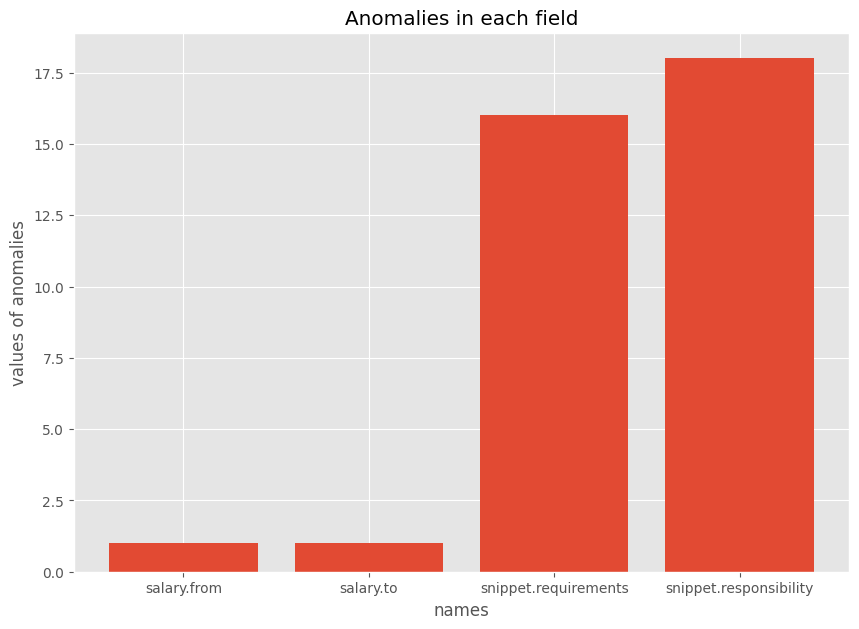

In [ ]:
salary_from = df[(df['salary.from'] < df['salary.from'].quantile(0.01)) | (df['salary.from'] > df['salary.from'].quantile(0.99))]
salary_to = df[(df['salary.to'] < df['salary.to'].quantile(0.01)) | (df['salary.to'] > df['salary.to'].quantile(0.99))]

length_req = df['snippet.requirement'].str.len()
length_res = df['snippet.responsibility'].str.len()

snippet_requirements = df[(length_req < length_req.quantile(0.01)) | (length_req > length_req.quantile(0.99))]
snippet_responsibility = df[(length_res < length_res.quantile(0.01)) | (length_res > length_res.quantile(0.99))]

anomalies = {
    'salary.from': len(salary_from),
    'salary.to': len(salary_to),
    'snippet.requirements': len(snippet_requirements),
    'snippet.responsibility': len(snippet_responsibility)
}

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(anomalies.keys(), anomalies.values())
ax.set_xlabel('names')
ax.set_ylabel('values of anomalies')
ax.set_title('Anomalies in each field')
plt.show()


4.	Построить круговую диаграмму по количеству вакансий в городах, используя поле area.name.
  4.1.	Добавить название графика, подписи клиньев с названием городов, доли, абсолютного значения.
  4.2.	Сделать выделяющимся клин с самой большой частотой (использовать параметр разброса – explode).


Москва             708
Санкт-Петербург    176
Екатеринбург        19
Name: area.name, dtype: int64


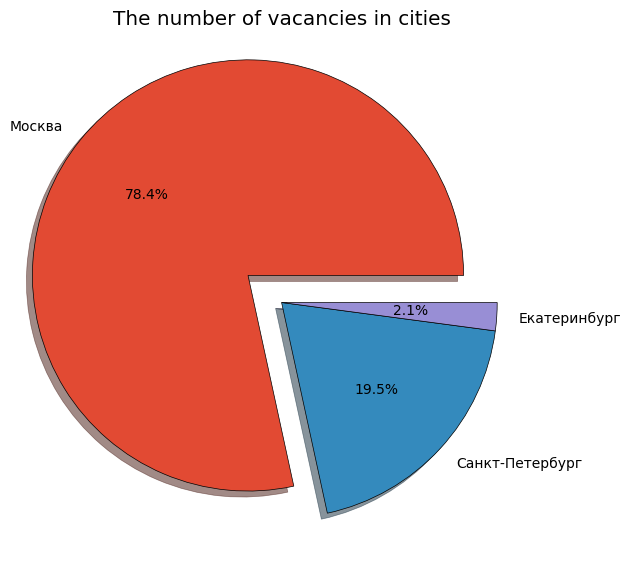

In [ ]:
fig = plt.figure(figsize=(10, 7))
names = df['area.name'].value_counts()
print(names)
explode = (0.2, 0, 0)
plt.pie(names.values, labels=names.index, autopct='%.1f%%', wedgeprops={'edgecolor':'black'}, explode=explode, shadow=True)
plt.title('The number of vacancies in cities')
plt.show()

5.	Построить гистограмму по полю salary.to
  5.1.	Добавить поле город и сделать гистограмму группированной (stacked) по городу


[0      500000.0
1      280000.0
2      250000.0
3      200000.0
5      240000.0
         ...   
868    150000.0
872    290000.0
880    130000.0
886    150000.0
887    150000.0
Name: salary.to, Length: 65, dtype: float64, 12    350000.0
Name: salary.to, dtype: float64, 43     400000.0
286    250000.0
346     80000.0
347    150000.0
368    400000.0
374    100000.0
386      7000.0
425      5000.0
443      3500.0
521      7000.0
593     70000.0
787      4500.0
824     91000.0
835      2000.0
Name: salary.to, dtype: float64]


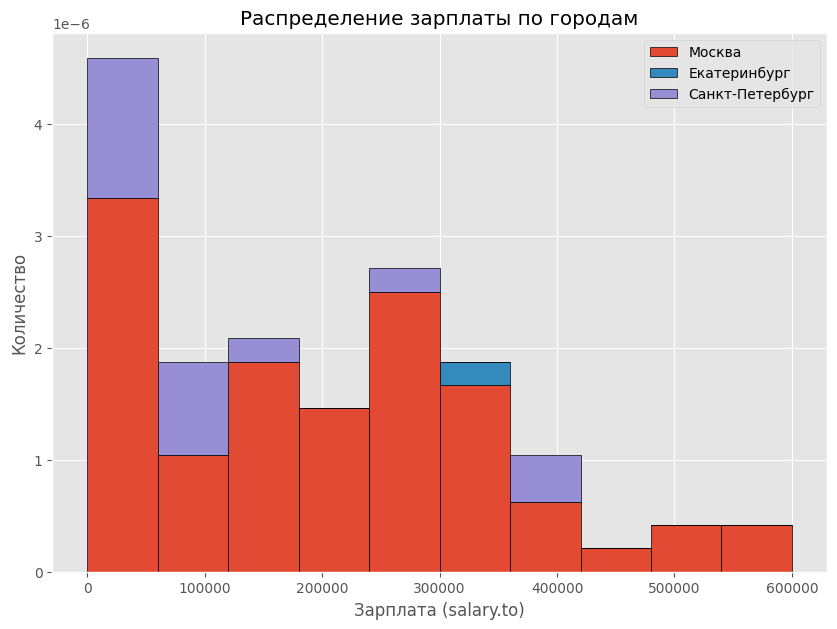

In [ ]:
cities = df['area.name'].unique()
salaries_by_city = [df[df['area.name'] == city]['salary.to'].dropna() for city in cities]
print(salaries_by_city)
fig = plt.figure(figsize=(10, 7))
plt.hist(salaries_by_city, edgecolor='black', stacked=True, density=True, label=cities)
plt.title('Распределение зарплаты по городам')
plt.xlabel('Зарплата (salary.to)')
plt.ylabel('Количество')
plt.legend()
plt.show()

6.	Построить тепловую карту средней зарплаты по полю salary.to в разрезе – расписания работы и города.

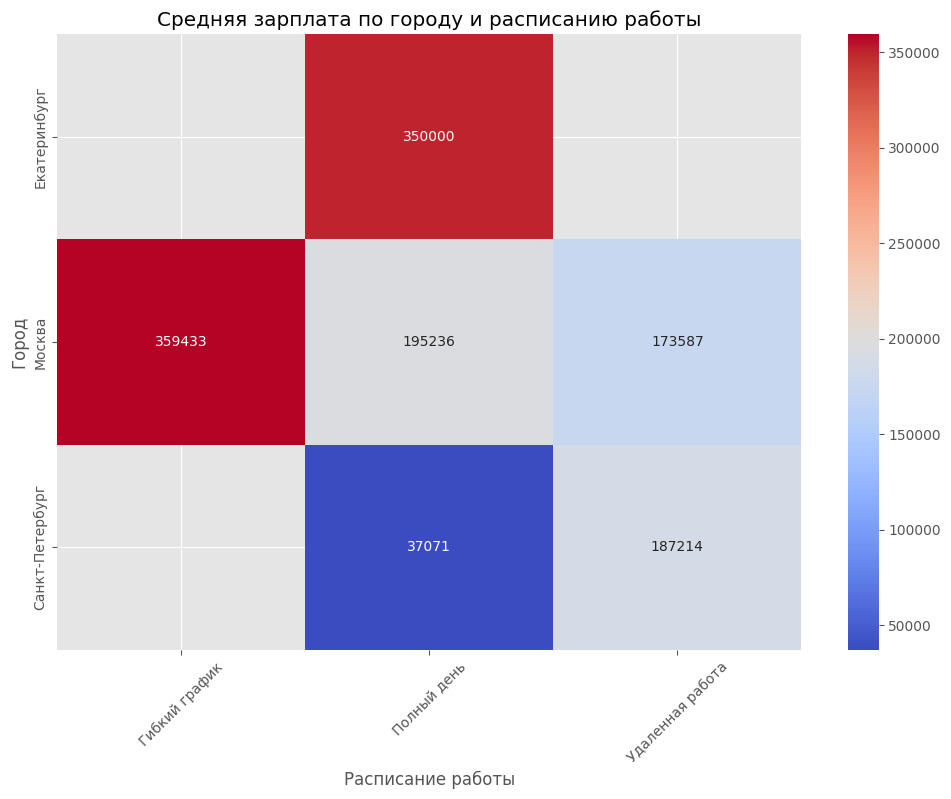

schedule.name    Гибкий график    Полный день  Удаленная работа
area.name                                                      
Екатеринбург               NaN  350000.000000               NaN
Москва           359433.333333  195236.111111     173587.260870
Санкт-Петербург            NaN   37071.428571     187214.285714


In [ ]:
ptable = df.pivot_table(index='area.name', columns='schedule.name', values='salary.to', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(ptable, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Средняя зарплата по городу и расписанию работы')
plt.xlabel('Расписание работы')
plt.ylabel('Город')
plt.xticks(rotation=45)
plt.show()

print(ptable)

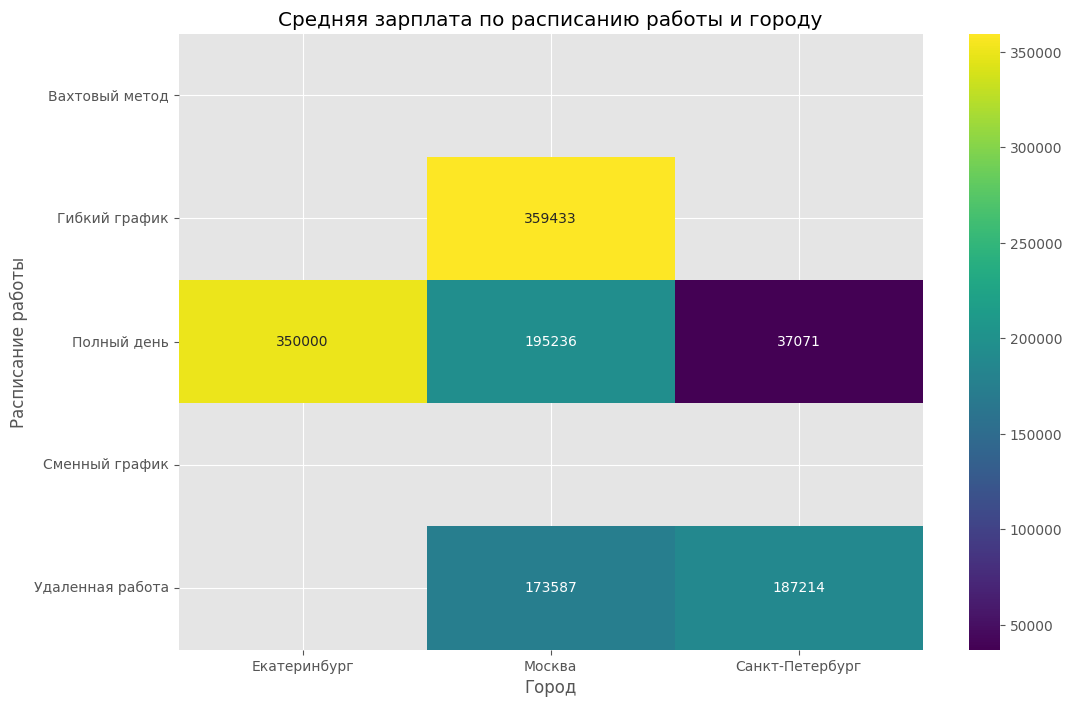

In [ ]:
import seaborn as sns
grouped_data = df.groupby(['schedule.name', 'area.name'])['salary.to'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, fmt=".0f", cmap='viridis')
plt.title('Средняя зарплата по расписанию работы и городу')
plt.xlabel('Город')
plt.ylabel('Расписание работы')
plt.show()

7.	Построить ящичковую диаграмму по полю salary.from в разрезе города.
  7.1.	Добавить свой цвет для города внутри диаграммы


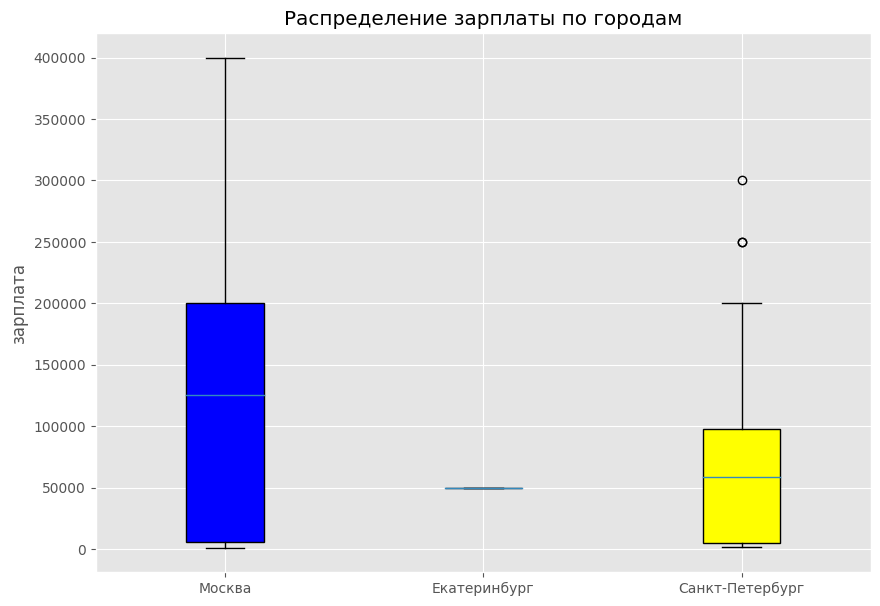

In [ ]:
cities = df['area.name'].unique()
salaries_by_city = [df[df['area.name'] == city]['salary.from'].dropna() for city in cities]
plt.figure(figsize=(10, 7))
bp = plt.boxplot(salaries_by_city, labels=cities, patch_artist=True)
colors = ['#0000FF', '#00FF00',
          '#FFFF00']
for patch, color in zip(bp['boxes'], colors):
  patch.set_facecolor(color)

plt.title('Распределение зарплаты по городам')
plt.ylabel('зарплата')
plt.show()

8.	Построить пончиковую диаграмму по частоте технологий - систем, фреймворков, библиотек (выделить из требований к кандидату с помощью строковых функций или модуля регулярных выражений - re)

<Figure size 1500x700 with 0 Axes>

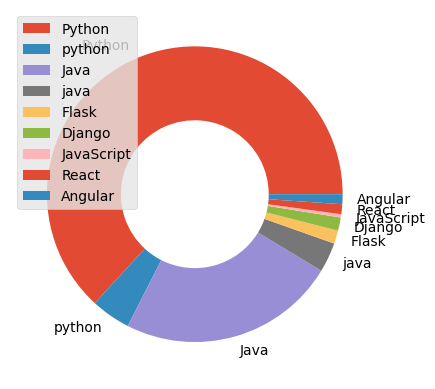

In [ ]:
import re
from collections import Counter

tech = []
for requirements in df['snippet.requirement']:
  if pd.isna(requirements):
        continue
  found = re.findall(r'\b(Java|Python|JavaScript|React|Angular|Django|Flask)\b', requirements, flags=re.I)
  tech.extend(found)

qnt = Counter(tech)
plt.figure(figsize=(15, 7))
fig, ax = plt.subplots()
ax.pie(qnt.values(), labels=qnt.keys(), wedgeprops=dict(width=0.5))
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

9.	Построить диаграмму рассеяния -  число лет опыта (выделить из требований к кандидату кандидату с помощью строковых функций или модуля регулярных выражений - re) – зарплата (поле salary.from)
  9.1.	Добавить сетку
  9.2.	Окрасить точки в цвета, связанный с городом
  9.3.	Добавить размер точки – число вакансий, приходящихся на координаты точки


<ipython-input-89-cf8a2c6bac3c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['points_size'] = [points_size[(x, y)] for x, y in zip(filtered_df['experience_years'], filtered_df['salary.from'])]
<ipython-input-89-cf8a2c6bac3c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['color'] = filtered_df['area.name'].map(city_colors)


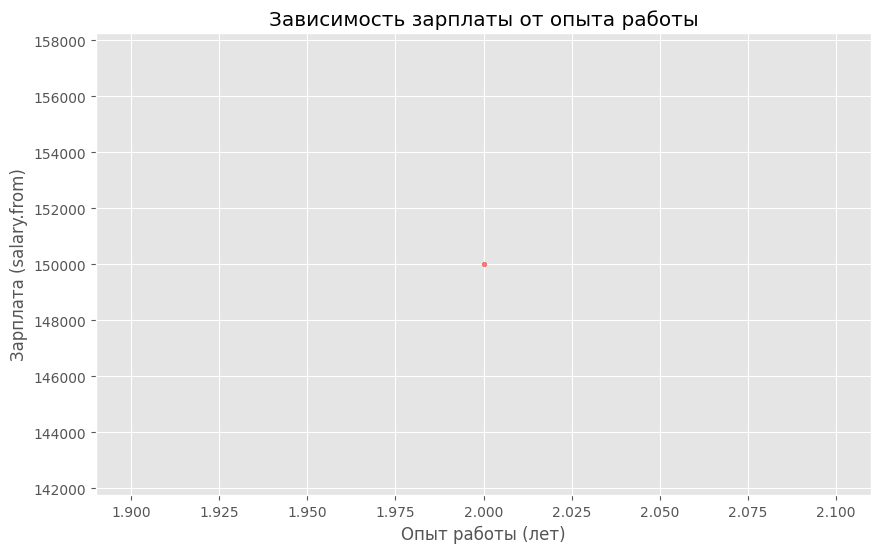

In [ ]:
from collections import defaultdict
# Заполнение пропущенных значений в 'requirements' пустой строкой перед циклом
df['snippet.requirement'] = df['snippet.requirement'].fillna('')

experience_years = []
for requirement in df['snippet.requirement']:
  if pd.isna(requirement):
      continue
  m = re.search(r'(\d+) (года|лет) опыта', requirement)

  if m:
      experience_years.append(int(m.group(1)))
  else:
      experience_years.append(None)

df['experience_years'] =  experience_years
filtered_df = df.dropna(subset=['experience_years', 'salary.from'])

points_size = defaultdict(int)
for _, row in filtered_df.iterrows():
    points_size[(row['experience_years'], row['salary.from'])] += 1
filtered_df['points_size'] = [points_size[(x, y)] for x, y in zip(filtered_df['experience_years'], filtered_df['salary.from'])]

# Замените значения в city_colors на реальные города из вашего DataFrame
city_colors = {'Москва': 'red', 'Санкт-Петербург': 'blue', 'Екатеринбург': 'green'}
filtered_df['color'] = filtered_df['area.name'].map(city_colors)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['experience_years'], filtered_df['salary.from'],
            s=filtered_df['points_size']*10,
            c=filtered_df['color'], alpha=0.5)

plt.title('Зависимость зарплаты от опыта работы')
plt.xlabel('Опыт работы (лет)')
plt.ylabel('Зарплата (salary.from)')
plt.grid(True)

plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

df_clean = df.dropna(subset=['salary.from'])
encoder = OneHotEncoder()
X = encoder.fit_transform(df[['area.name', 'schedule.name']])
y = df['salary.from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df_clean = df.dropna(subset=['salary.from'])

X = encoder.fit_transform(df_clean[['area.name', 'schedule.name']])
y = df_clean['salary.from']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
coefficients = model.coef_


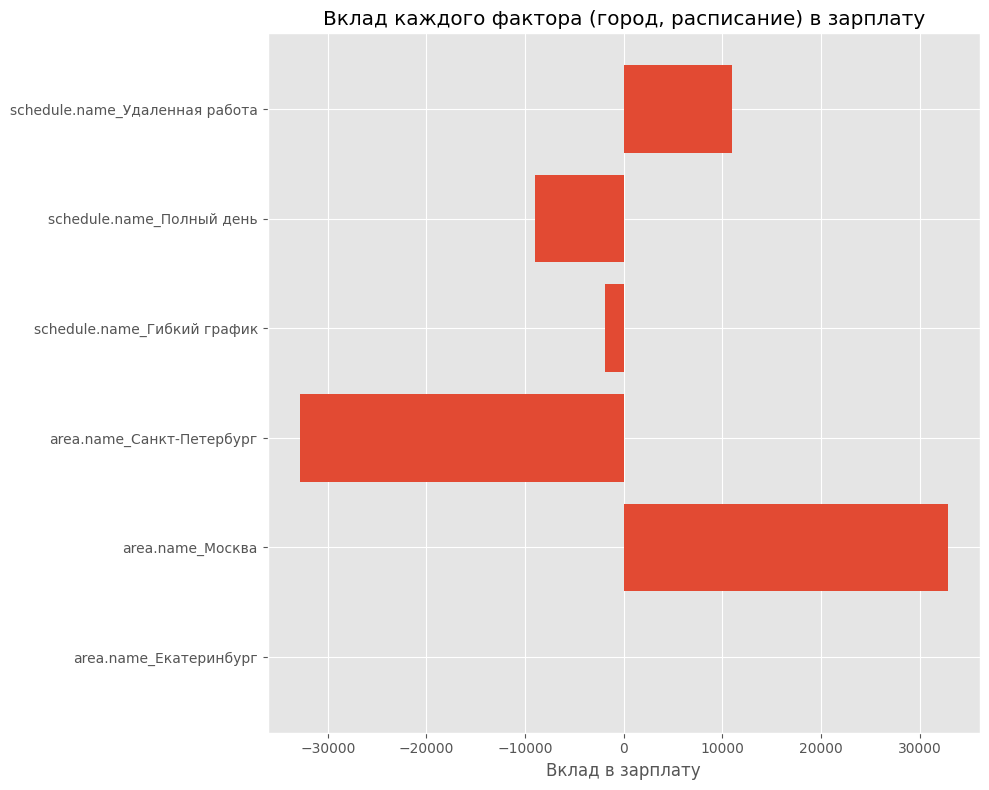

In [ ]:
feature_names = encoder.get_feature_names_out(['area.name', 'schedule.name'])

plt.figure(figsize=(10, 8))
plt.barh(feature_names, coefficients)
plt.xlabel('Вклад в зарплату')
plt.title('Вклад каждого фактора (город, расписание) в зарплату')
plt.tight_layout()
plt.show()
